Here we do imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers         #for model

import numpy as np                         #for numpy arrays

import matplotlib.pyplot as plt            #for visualizing

import zipfile
import os
import cv2
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder
from google.colab import files
                   # for data

Now we must download the data called "Mashtoc"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = "/content/drive/My Drive/mashtots-dataset-v2.zip"
extract_path = "/content/mashtots_dataset"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("archive extracted in:", extract_path)

archive extracted in: /content/mashtots_dataset


In [ ]:
file_list = os.listdir(extract_path)
print(file_list[:10])

['sample_submission.csv', 'Train', 'new_test']


In [ ]:
label_dict1 = {
    0: "Ա", 1: "Բ", 2: "Գ", 3: "Դ", 4: "Ե", 5: "Զ", 6: "Է", 7: "Ը", 8: "Թ", 9: "Ժ",
    10: "Ի", 11: "Լ", 12: "Խ", 13: "Ծ", 14: "Կ", 15: "Հ", 16: "Ձ", 17: "Ղ", 18: "Ճ", 19: "Մ",
    20: "Յ", 21: "Ն", 22: "Շ", 23: "Ո", 24: "ՈՒ", 25: "Չ", 26: "Պ", 27: "Ջ", 28: "Ռ", 29: "Ս",
    30: "Վ", 31: "Տ", 32: "Ր", 33: "Ց", 34: "Փ", 35: "Ք", 36: "և", 37: "Օ", 38: "Ֆ",
    39: "ա", 40: "բ", 41: "գ", 42: "դ", 43: "ե", 44: "զ", 45: "է", 46: "ը", 47: "թ", 48: "ժ",
    49: "ի", 50: "լ", 51: "խ", 52: "ծ", 53: "կ", 54: "հ", 55: "ձ", 56: "ղ", 57: "ճ", 58: "մ",
    59: "յ", 60: "ն", 61: "շ", 62: "ո", 63: "ու", 64: "չ", 65: "պ", 66: "ջ", 67: "ռ", 68: "ս",
    69: "վ", 70: "տ", 71: "ր", 72: "ց", 73: "փ", 74: "ք", 75: "և", 76: "օ", 77: "ֆ"
}


that is example of Armenian handwriting

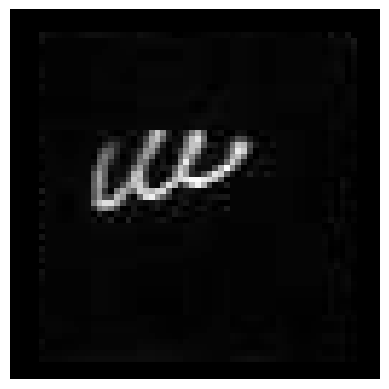

In [ ]:
img_path = "/content/mashtots_dataset/Train/Train/39/1.png"

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show()

Here we will separate mashtoc data, becouse we wanna get train dataset and test dataset, with labels

mtnum enq mer data - i "Train" papkan vortex ka 77 hat urish papka, amen papkai mej mot 800 hat nkar: tesnum enq te vor papkai hamary vor tarina hamapatasxan

In [ ]:

reverse_label_dict = {v: k for k, v in label_dict1.items()}

for label_folder in sorted(os.listdir(dataset_path)):
    folder_path = os.path.join(dataset_path, label_folder)
    if os.path.isdir(folder_path):
        try:
            folder_num = int(label_folder)
            if folder_num in label_dict1:
                letter = label_dict1[folder_num]
                print(f"Папка {label_folder} соответствует букве {letter}")

                for img_name in os.listdir(folder_path):
                    img_path = os.path.join(folder_path, img_name)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        img = cv2.resize(img, (64, 64))
                        X.append(img)
                        y.append(folder_num)
            else:
                print(f"Предупреждение: Папка {label_folder} не имеет соответствия в label_dict1")
        except ValueError:
            print(f"Предупреждение: Имя папки {label_folder} не является числом")


X = np.array(X)
y = np.array(y)

Папка 0 соответствует букве Ա
Папка 1 соответствует букве Բ
Папка 10 соответствует букве Ի
Папка 11 соответствует букве Լ
Папка 12 соответствует букве Խ
Папка 13 соответствует букве Ծ
Папка 14 соответствует букве Կ
Папка 15 соответствует букве Հ
Папка 16 соответствует букве Ձ
Папка 17 соответствует букве Ղ
Папка 18 соответствует букве Ճ
Папка 19 соответствует букве Մ
Папка 2 соответствует букве Գ
Папка 20 соответствует букве Յ
Папка 21 соответствует букве Ն
Папка 22 соответствует букве Շ
Папка 23 соответствует букве Ո
Папка 24 соответствует букве ՈՒ
Папка 25 соответствует букве Չ
Папка 26 соответствует букве Պ
Папка 27 соответствует букве Ջ
Папка 28 соответствует букве Ռ
Папка 29 соответствует букве Ս
Папка 3 соответствует букве Դ
Папка 30 соответствует букве Վ
Папка 31 соответствует букве Տ
Папка 32 соответствует букве Ր
Папка 33 соответствует букве Ց
Папка 34 соответствует букве Փ
Папка 35 соответствует букве Ք
Папка 36 соответствует букве և
Папка 37 соответствует букве Օ
Папка 38 со

'for label in os.listdir(dataset_path):\n    label_path = os.path.join(dataset_path, label)\n    if os.path.isdir(label_path):\n        for img_name in os.listdir(label_path):\n            img_path = os.path.join(label_path, img_name)\n            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)\n            img = cv2.resize(img, (64, 64))\n            X.append(img)\n            y.append(label_dict1[label])\n\nX = np.array(X)\ny = np.array(y)\n\n\nfor label in os.listdir(dataset_path):\n  label_path = os.path.join(dataset_path, label)\n  if os.path.isdir(label_path):\n    for img_name in os.listdir(label_path):\n      img_path = os.path.join(label_path, img_name)\n      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)\n      img = cv2.resize(img, (64, 64))\n      X.append(img)\n      y.append(label)\nX = np.array(X)\ny = np.array(y)'

In [ ]:
print("Уникальные метки:", np.unique(y))

Уникальные метки: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


In [ ]:
X = X.reshape(-1, 64, 64, 1) / 255.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#label_encoder = LabelEncoder()
#y_train = label_encoder.fit_transform(y_train)
#y_test = label_encoder.transform(y_test)

print(y_test[:10])
print(y_train[:10])

[70 22  4 58 55 31 75  0 54 63]
[52 47 70 23 51 62 74  7 30 14]


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56048, 64, 64, 1)
(14012, 64, 64, 1)
(56048,)
(14012,)


we've already have preprocesed data, now we need create a model like LeNet

In [ ]:
MesRop = keras.Sequential([
    layers.Conv2D(32, kernel_size=3, activation="relu", input_shape=(64, 64, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(64, kernel_size=3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(128, kernel_size=3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(78, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
MesRop.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
MesRop.fit(X_train, y_train, epochs = 10, validation_data=(X_test, y_test))

loss, accuracy = MesRop.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.4973 - loss: 2.0373 - val_accuracy: 0.7124 - val_loss: 0.9918
Epoch 2/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - accuracy: 0.8556 - loss: 0.4763 - val_accuracy: 0.5562 - val_loss: 2.0552
Epoch 3/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8914 - loss: 0.3514 - val_accuracy: 0.8980 - val_loss: 0.3880
Epoch 4/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9138 - loss: 0.2786 - val_accuracy: 0.8903 - val_loss: 0.4173
Epoch 5/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9257 - loss: 0.2279 - val_accuracy: 0.8718 - val_loss: 0.5095
Epoch 6/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9376 - loss: 0.1937 - val_accuracy: 0.9099 - val_loss: 0.3138
Epoch 7/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9481 - loss: 0.1592 - val_accuracy: 0.9035 - val_loss: 0.3349
Epoch 8/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9525 - loss: 

In [ ]:
def predict_image(image):
  image = np.expand_dims(image, axis=0)
  prediction = MesRop.predict(image, verbose=0)
  return np.argmax(prediction)

3270
9
9


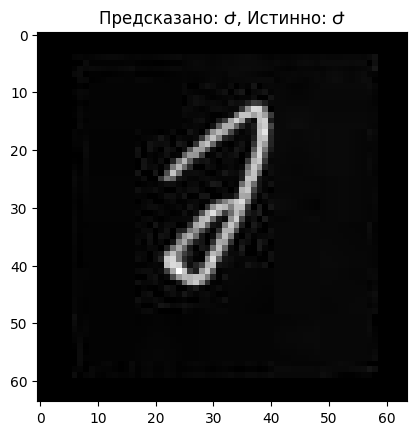

In [ ]:
index = np.random.randint(0, len(X_test))
image = X_test[index]
print(index)

predicted_letter = label_dict1[predict_image(image)]
actual_letter = label_dict1[y_test[index]]

print(predict_image(image))
print(y_test[index])


plt.imshow(image.reshape(64, 64), cmap="gray")
plt.title(f"Предсказано: {predicted_letter}, Истинно: {actual_letter}")
plt.show()


In [ ]:
MesRop.save("MesRop_model.h5")

MesRop.save("/content/drive/MyDrive/MesRop_model.h5")

np.save("/content/drive/MyDrive/X_test.npy", X_test)
np.save("/content/drive/MyDrive/y_test.npy", y_test)

In [ ]:
y_pred_probs = MesRop.predict(X_test)  # Get probability distributions
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

from sklearn.metrics import classification_report, confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Count correctly classified and misclassified samples
correctly_classified = np.diag(conf_matrix)  # Diagonal contains correct predictions
misclassified = np.sum(conf_matrix, axis=1) - correctly_classified  # Row sum - correct

# Generate classification report
report = classification_report(y_test, y_pred, digits=4)

# Display results
print("Classification Report:\n", report)

print("\nPer-Class Correct & Misclassified Samples:")
for i in range(len(correctly_classified)):
    print(f"Class {i}: Correct = {correctly_classified[i]}, Misclassified = {misclassified[i]}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0     0.9600    0.9492    0.9545       177
           1     0.9091    0.9574    0.9326       188
           2     0.8827    0.9349    0.9080       169
           3     0.9509    0.8908    0.9199       174
           4     0.9274    0.9595    0.9432       173
           5     0.9216    0.9592    0.9400       147
           6     0.9108    0.9533    0.9316       150
           7     0.9548    0.9250    0.9397       160
           8     0.9425    0.9535    0.9480       172
           9     0.9253    0.9045    0.9148       178
          10     0.8261    0.9620    0.8889       158
          11     0.9482    0.9839    0.9657       186
          12     0.9722    0.9563    0.9642       183
          13     0.9535    0.9820    0.9676       167
          14     0.9515    0.9937    0.9721       158
          15     0.9461    0.8634    0.9029       183
          16    

In [ ]:
# Count misclassified samples per class
correctly_classified = np.diag(conf_matrix)  # Diagonal = correctly classified
total_samples_per_class = np.sum(conf_matrix, axis=1)  # Total samples per class
misclassified = total_samples_per_class - correctly_classified  # Misclassified count

# Get indices of 5 most misclassified classes
most_misclassified_indices = np.argsort(misclassified)[-5:][::-1]  # Sort in descending order

# Print the 5 most misclassified classes
print("Top 5 Most Misclassified Letters:")
for i, class_idx in enumerate(most_misclassified_indices):
    print(f"{i+1}. Class {class_idx} - Misclassified: {misclassified[class_idx]} times")


print("\nMost Misclassified Letters with Labels:")
for class_idx in most_misclassified_indices:
    print(f"Letter '{label_dict1[class_idx]}' - Misclassified: {misclassified[class_idx]} times")

Top 5 Most Misclassified Letters:
1. Class 27 - Misclassified: 63 times
2. Class 52 - Misclassified: 32 times
3. Class 54 - Misclassified: 30 times
4. Class 56 - Misclassified: 28 times
5. Class 71 - Misclassified: 27 times

Most Misclassified Letters with Labels:
Letter 'Ռ' - Misclassified: 63 times
Letter 'ծ' - Misclassified: 32 times
Letter 'հ' - Misclassified: 30 times
Letter 'ղ' - Misclassified: 28 times
Letter 'ց' - Misclassified: 27 times
